### Import packages 

In [1]:
#Importing packages
import time
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model, layers, Input

### Define the Hyperparameter & Data info

In [2]:
#Learning Rate, Iterations, Batch Size Hyperparameters
learning_rate = 0.001
iterations = 40000
batch_size = 256
#dropout = 0.5
#epochs = 10

### Load CIFAR-10 Data

In [3]:
#CIFAR-10 Dataset has 60000 images of common objects, 6k images per class and 10 classes in total
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### Data Preparation

In [4]:
#Convert to float type
X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

#Flatten images to 1-D vector of 3072 features (32*32*3)
X_train, X_test = X_train.reshape([-1, 3072]), X_test.reshape([-1, 3072])

#One hot encoding of labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

#Normalization of images
X_train = X_train / 255.
X_test = X_test / 255.

#Use Tensorflow data for shuffling and fetching it batchwise
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 3072)
(50000, 10)
(10000, 3072)
(10000, 10)


## Define the model, Using L2 Regularizer 
### We will see the graphs later to understand the difference of adding Dropout

In [5]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(1024, input_dim = 3072 , activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer = regularizers.L2(0.01)))
model.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.L2(0.01)))
model.add(layers.Dense(128, activation = 'relu', kernel_regularizer = regularizers.L2(0.01)))
model.add(layers.Dense(10, activation = 'softmax'))

### Compile the model with optimizer

In [6]:
log_dir = "logs_l2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

model.compile(optimizer= tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [7]:
history = model.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test),
                    epochs = 25, callbacks = [tensorboard_callback], batch_size = batch_size)

Epoch 1/25
  1/196 [..............................] - ETA: 0s - loss: 14.3011 - accuracy: 0.0820WARNING:tensorflow:From C:\Users\Pranav\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
196/196 [==============================] - 15s 79ms/step - loss: 4.6478 - accuracy: 0.2884 - val_loss: 2.6097 - val_accuracy: 0.3209
Epoch 2/25
196/196 [==============================] - 16s 82ms/step - loss: 2.2329 - accuracy: 0.3719 - val_loss: 2.0433 - val_accuracy: 0.3808
Epoch 3/25
196/196 [==============================] - 13s 65ms/step - loss: 1.9322 - accuracy: 0.3994 - val_loss: 1.9393 - val_accuracy: 0.3784
Epoch 4/25
196/196 [==============================] - 13s 65ms/step - loss: 1.8053 - accuracy: 0.4172 - val_loss: 1.7522 - val_accuracy: 0.4236
Epoch 5/25
196/196 [==============================] - 15

### Plotting Accuracy and Loss graphs

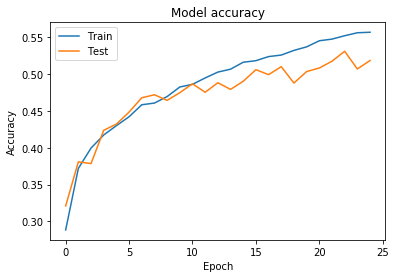

In [8]:
#Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

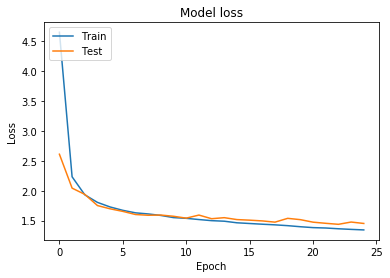

In [9]:
#Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4532 - accuracy: 0.5183


[1.4532421827316284, 0.5182999968528748]

## Model without L2 Regularizer

In [11]:
model1 = tf.keras.models.Sequential()
model1.add(layers.Dense(1024, input_dim = 3072 , activation = 'relu'))
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(256, activation = 'relu'))
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.Dense(10, activation = 'softmax'))

### Compile the model with optimizer

In [12]:
log_dir_latest = "logs_l2/fit_latest/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_latest = tf.keras.callbacks.TensorBoard(log_dir = log_dir_latest, histogram_freq = 1)

model1.compile(optimizer= tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [13]:
history1 = model1.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test),
                    epochs = 25, callbacks = [tensorboard_callback_latest], batch_size = batch_size)

Epoch 1/25
196/196 [==============================] - 16s 81ms/step - loss: 1.9568 - accuracy: 0.2888 - val_loss: 1.7854 - val_accuracy: 0.3539
Epoch 2/25
196/196 [==============================] - 13s 64ms/step - loss: 1.6977 - accuracy: 0.3936 - val_loss: 1.7045 - val_accuracy: 0.39210s - los
Epoch 3/25
196/196 [==============================] - 13s 65ms/step - loss: 1.6063 - accuracy: 0.4277 - val_loss: 1.6036 - val_accuracy: 0.4258
Epoch 4/25
196/196 [==============================] - 15s 75ms/step - loss: 1.5427 - accuracy: 0.4489 - val_loss: 1.5043 - val_accuracy: 0.4654
Epoch 5/25
196/196 [==============================] - 12s 63ms/step - loss: 1.4992 - accuracy: 0.4647 - val_loss: 1.5071 - val_accuracy: 0.4681
Epoch 6/25
196/196 [==============================] - 15s 75ms/step - loss: 1.4585 - accuracy: 0.4765 - val_loss: 1.4844 - val_accuracy: 0.4747
Epoch 7/25
196/196 [==============================] - 12s 63ms/step - loss: 1.4191 - accuracy: 0.4948 - val_loss: 1.4817 - val_a

### Plotting Accuracy and Loss Graphs

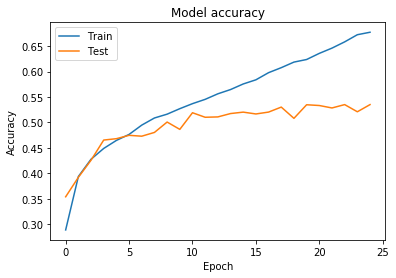

In [14]:
#Accuracy Graph
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

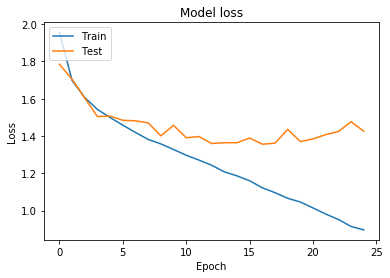

In [15]:
#Loss Graph
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
model1.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4258 - accuracy: 0.5351


[1.4257856607437134, 0.535099983215332]

## Note: Here we demonstrate only the affect of L2 Regularizer, and not focusing on improving the capacity of the network, which can be done by adding proper Regularization, BatchNormalization and Augmentation in a Bigger and better CNN approach network 